### Código para ejemplificar cómo genera curvas de luz el modelo Mandel-Agol
Curvas sin ruido ("perfectas")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import astropy
from PyAstronomy.modelSuite.XTran import forTrans as ft

kepler_delta = 0.020433587455414834

In [3]:
# Create MandelAgolLC object with
# circular orbit and quadratic limb darkening
#ma = ft.MandelAgolLC(orbit="circular", ld="quad")
ma = ft.mandelAgol.MandelAgolLC(orbit="circular", ld="quad")

# See the available parameters and their current values
ma.parameterSummary()

# Set parameters
ma["per"] = 0.2
ma["i"] = 90.0
ma["a"] = 6.5
ma["T0"] = 0.0
ma["p"] = 0.16
ma["linLimb"] = 0.47
ma["quadLimb"] = 0.24
ma["b"] = 0.

# Choose some time axis
time = np.linspace(0, 0.5, 1000)

# ... and calculate model
y = ma.evaluate(time)

# Let's see what happened ...
plt.plot(time, y, 'b.')
plt.show()


PyARequiredImport: 
---------------------
A PyA error occurred:
---------------------
Type of error: PyA import error
What happened?
    Could not import required shared object library 'occultquad.so'
What are possible solutions?
  - Use 'pip install PyAstronomy_ext' to get it.
  - Invoke PyA's install script (setup.py) with the --with-ext option.
  - Go to 'forTrans' directory of PyAstronomy and invoke
    f2py -c occultquad.pyf occultquad.f


In [7]:
#generar sobre alguna curva?
folder = "../../KOI_Data/"
df_meta = pd.read_csv(folder+"/koi_metadata.csv")

#semi major axis de aca es en Unidades astronomicas, no en Stellar radius
metadata_MA_needed = ["NExScI Disposition",
                      "Period","Duration", "Semi-major Axis", "a/R", "Time of Transit Epoch","r/R",
                     "Inclination","Limb Darkening Coeff1", "Limb Darkening Coeff2", "Planet Radius"]

df_meta[metadata_MA_needed]

,NExScI Disposition,Period,Duration,Semi-major Axis,a/R,Time of Transit Epoch,r/R,Inclination,Limb Darkening Coeff1,Limb Darkening Coeff2,Planet Radius
0,CONFIRMED,8.884923,2.07004,0.079,36.466,169.991686,0.114,89.89,0.497,0.204,10.51
1,FALSE POSITIVE,5.092465,3.65900,0.052,10.670,357.535940,0.014,89.14,0.551,0.165,1.17
2,FALSE POSITIVE,275.073650,3.37000,0.789,512.000,315.248600,0.014,89.93,0.437,0.243,1.86
3,FALSE POSITIVE,8.460439,4.73492,0.075,14.087,133.774490,0.478,85.68,0.299,0.306,36.62
4,CANDIDATE,21.761298,1.24300,0.140,137.070,166.540438,0.032,89.95,0.627,0.108,2.53
5,CANDIDATE,4.287467,1.56930,0.050,19.940,262.062450,0.026,88.93,0.517,0.191,2.29
6,FALSE POSITIVE,0.539366,5.43400,0.017,1.012,131.974570,0.016,12.57,0.314,0.304,9.19
7,FALSE POSITIVE,36.267167,2.06500,0.182,134.100,155.081300,0.022,89.91,0.644,0.101,1.50
8,CANDIDATE,4.298920,2.74700,0.049,3.810,132.861870,0.020,75.22,0.526,0.186,2.12
9,FALSE POSITIVE,161.788327,5.31000,0.607,289.800,214.039000,0.273,89.95,0.373,0.283,36.14


### With PyAstronomy -- MandelAgol
https://www.hs.uni-hamburg.de/DE/Ins/Per/Czesla/PyA/PyA/modelSuiteDoc/forTrans.html

In [ ]:
"""
Orbital model parameters (circular orbit):
        p - Radius ratio between planet and star.
        a - Semi-major axis of planetary orbit [stellar radii].
        i - Inclination of orbit in degrees (90 deg is edge on view).
        T0 - Time offset of transit center.
        per - Period of planetary orbit.
        b - Describes the flux ratio between a stellar companion and the main star (default is 0).
"""
ma = ft.mandelAgol.MandelAgolLC(orbit="circular", ld="quad")

# Set parameters
ma["per"] = 8.8
ma["i"] = 89.89
ma["a"] = 36.466
ma["T0"] = 169.991686  #ver si afecta..
ma["p"] = 0.114

#ma["linLimb"] = 0.47
#ma["quadLimb"] = 0.24

# Choose some time axis
time = np.linspace(0, 100, kepler_delta) #should be readed by Kepler

lc = ma.evaluate(time)
plt.plot(time, y, 'b.')
plt.show()

### With Everest  -- MandelAgol
https://rodluger.github.io/everest/transit.html

In [3]:
import everest
"""
A Mandel-Agol transit model, but with the depth and the duration as primary input variables.
Parameters:	

    time (numpy.ndarray) – The time array
    t0 (float) – The time of first transit in units of BJD - 2454833.
    dur (float) – The transit duration in days. Don’t go too crazy on this one – very small or very large values will break the inverter. Default 0.1
    per (float) – The orbital period in days. Default 3.56789
    depth (float) – The fractional transit depth. Default 0.001
    kwargs (dict) – Any additional keyword arguments, passed directly to pysyzygy.Transit()

Returns The transit model evaluated at the same times as the time array
"""

time = np.arange(0, 30, kepler_delta) #should be readed by Kepler

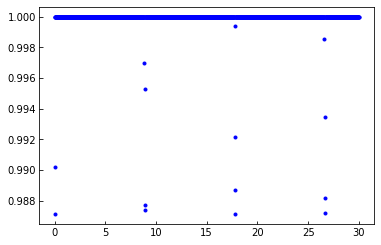

In [6]:
depth = (0.114)**(2) #(r/R)**2
lc_simulated = everest.transit.Transit(time, t0=0.0, per=8.88, dur=2/24, depth=depth)
plt.plot(time, lc_simulated, 'b.') #bien rara la libreria.. probar otra.

### With pysyzygy  -- MandelAgol
https://github.com/rodluger/pysyzygy

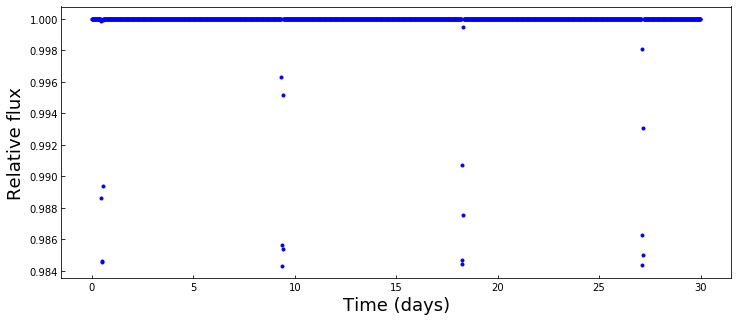

In [20]:
import pysyzygy as ps
"""
- **b** or **bcirc** - The (circular) impact parameter. Default `0.`
    - **MpMs** - The planet-star mass ratio. Default `0.`
    - **per** - The planet orbital period in days. Default `10.`
    - **RpRs** - The planet-star radius ratio. Default `0.1`
    - **rhos** or **aRs** - The stellar density in `g/cm^3` or the semi-major axis-stellar radius ratio. \
                            Default is `rhos = 1.4`, the density of the Sun
    - **ecc** and **w** or **esw** and **ecw** - The eccentricity and the longitude of pericenter in radians, \
                                                 or the two eccentricity vectors. Default is `ecc = 0.` and `w = 0.`
    - **t0** or **times** - The time of first transit, or the time of each of the transits (in case \
                            they are not periodic) in days. Default is `t0 = 0.`
  
    - **ldmodel** - The limb darkening model. Default `ps.QUADRATIC` (only option for now!)
    - **u1** and **u2** or **q1** and **q2** - The quadratic limb darkening parameters (u1, u2) or the \
                                               modified quadratic limb darkening parameters (q1, q2) \
                                               from `Kipping (2013) <http://dx.doi.org/10.1093/mnras/stt1435>`_. \
                                               Default is `u1 = 0.40` and `u2 = 0.26`
    
    - **exptime** - The exposure time in days for binning the model. Default `ps.KEPLONGEXP`
    - **fullorbit** - Compute the orbital parameters for the entire orbit? Only useful if \
                      you're interested in the full arrays of orbital parameters. Default `False`
    - **maxpts** - Maximum number of points in the model. Increase this if you're getting errors. Default `10,000`
    - **exppts** - The number of exposure points per cadence when binning the model. Default `50`
    - **binmethod** - The binning method. Default `ps.RIEMANN` (recommended)
    - **intmethod** - The integration method. Default `ps.SMARTINT` (recommended)
    - **keptol** - The tolerance of the Kepler solver. Default `1.e-15`
    - **maxkepiter** - Maximum number of iterations in the Kepler solver. Default `100`
    - **kepsolver** - The Kepler solver to use. Default `ps.NEWTON` (recommended)

"""
# Instantiate a transit object
model = ps.Transit(per = 8.88, RpRs = 0.114, t0 = 0.5, aRs= 36.466, maxpts=65000) 

# Now evaluate the light curve on a grid of observation times
t = np.arange(0., 30, kepler_delta)
lc_simulated = model(t)

# Plot the light curve
plt.figure(figsize = (12, 5))
#fig.subplots_adjust(bottom = 0.15)
plt.plot(t, lc_simulated, 'b.')
plt.xlabel('Time (days)', fontsize = 18)
plt.ylabel('Relative flux', fontsize = 18)
plt.show()

### With PyTransit
https://github.com/hpparvi/PyTransit

In [1]:
from pytransit import QuadraticModel
"""
after which it can be evaluated using either a set of scalar arguments
(radius-ratio: k, 
zero-epoch: t0, 
orbital period: p, 
scaled semi-major axis: a,
orbital inclination: i, 
eccentricity: e,
argument of periastron: w,
array of limb darkening coefficients ldc
"""
times = np.arange(0., 30, kepler_delta)

model = QuadraticModel()
model.set_data(times)

lc_simulated = model.evaluate_ps(k = 0.114, t0=0.5, p=8.88, a=0.079, i=88.89, e=0)

SyntaxError: invalid syntax (transitmodel.py, line 49)

In [ ]:
from pytransit import MandelAgol
model = MandelAgol()

### With batman
https://www.cfa.harvard.edu/~lkreidberg/batman/tutorial.html#initializing-the-model

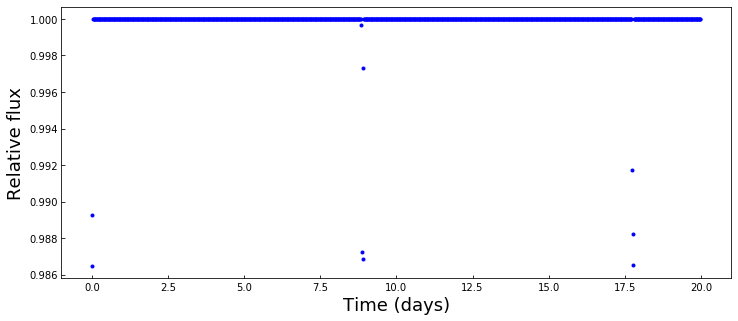

In [9]:
import batman
params = batman.TransitParams()       #object to store transit parameters
params.t0 = 0                        #time of inferior conjunction
params.per = 8.88                       #orbital period
params.rp = 0.114                      #planet radius (in units of stellar radii)--rp/rs
params.a = 36.466                     #semi-major axis (in units of stellar radii) -- el que tengo es AU
params.inc = 88.89                      #orbital inclination (in degrees)
params.limb_dark = "quadratic"        #limb darkening model
params.u = [0.497, 0.204]      #limb darkening coefficients [u1, u2, u3, u4]

#dont known in kepler
params.ecc = 0.                       #eccentricity
params.w = 90.                        #longitude of periastron (in degrees)

times = np.arange(0, 20, kepler_delta)
m = batman.TransitModel(params, times)    #initializes model
lc_simulated = m.light_curve(params)

# Plot the light curve
plt.figure(figsize = (12, 5))
#fig.subplots_adjust(bottom = 0.15)
plt.plot(times, lc_simulated, 'b.')
plt.xlabel('Time (days)', fontsize = 18)
plt.ylabel('Relative flux', fontsize = 18)
plt.show()

In [78]:
import numpy as np
folder_lc = "/work/work_teamEXOPLANET/KOI_LC/"
process_lc = np.load(folder_lc+'/cleaned/LC_kepler_processed.npy')
mandel_lc = np.load(folder_lc+'/npy/KOI_LC_model.npy')
time_lc = np.load(folder_lc+'/npy/KOI_LC_time.npy')

#process_lc = np.nan_to_num(process_lc)

process_lc

array([[-3.34071740e-04, -9.56036533e-04, -3.20341756e-04, ...,
         9.60861553e-05, -4.28106840e-03, -1.24094493e-04],
       [            nan,             nan,             nan, ...,
         2.43145845e-04,  5.07318850e-04,  7.28473887e-04],
       [            nan,             nan,             nan, ...,
        -5.09219964e-04, -6.28478091e-04, -4.82152588e-04],
       ...,
       [-4.26950242e-04,  6.72681813e-04, -5.06025675e-04, ...,
         1.17988662e-04,  5.61176640e-04, -8.82411989e-04],
       [-3.78445133e-04,  7.17432038e-04, -4.64985683e-04, ...,
         1.27586012e-04,  5.71776436e-04, -8.70897239e-04],
       [-1.71322380e-05, -1.38334626e-04,  8.02269873e-04, ...,
         4.07656344e-04, -1.24859904e-03, -4.05257242e-04]])

In [79]:
import matplotlib.pyplot as plt
def plot_n_lc(time, real_lc, n_sampleds):
    
    for n_sampled in n_sampleds:
        metadata_n = df_meta.iloc[n_sampled]
        
        period = metadata_n["Period"]
        duration = metadata_n["Duration"]/24
        a_R = metadata_n["a/R"]
        t_0 = metadata_n["Time of Transit Epoch"]
        r_R = metadata_n["r/R"]
        inclination = metadata_n["Inclination"]
        u1 = metadata_n["Limb Darkening Coeff1"]
        u2 = metadata_n["Limb Darkening Coeff2"]
        
        model = ps.Transit(per = period, RpRs = r_R, t0 = t_0, u1=u1,u2=u2, aRs= a_R, maxpts=65000) 
        """
        params = batman.TransitParams()       #object to store transit parameters
        params.t0 = t_0                         #time of inferior conjunction
        params.per = period                      #orbital period
        params.rp = r_R                     #planet radius (in units of stellar radii)--rp/rs
        params.a = a_R                     #semi-major axis (in units of stellar radii) 
        params.inc = inclination                      #orbital inclination (in degrees)
        params.limb_dark = "quadratic"        #limb darkening model
        params.u = [0.497, 0.204]      #limb darkening coefficients [u1, u2, u3, u4]
        params.ecc = 0.                       #eccentricity
        params.w = 90.                        #longitude of periastron (in degrees)
        model = batman.TransitModel(params, time[n_sampled])    #initializes model
        
        lc_simulated = model.light_curve(params)
        """
        lc_simulated = model(time[n_sampled]-t_0) #primer error/contratiempo encontrado (TIEMPO)
        #print(lc_simulated)
        
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True,figsize= (15,5))
        ax1.plot(time[n_sampled], real_lc[n_sampled], 'b.-')
        ax1.set_title("Real")
        ax2.plot(time[n_sampled], lc_simulated, 'b.-')
        ax2.set_title("Simulated")
        plt.show()
        print("----------------------------------------------------------------")

In [80]:
n_sampleds = np.random.randint(0, process_lc.shape[0], size=10)

Raw light curve comparison


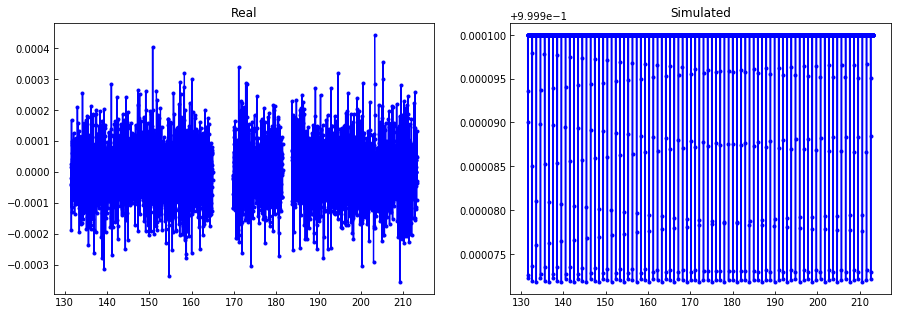

----------------------------------------------------------------


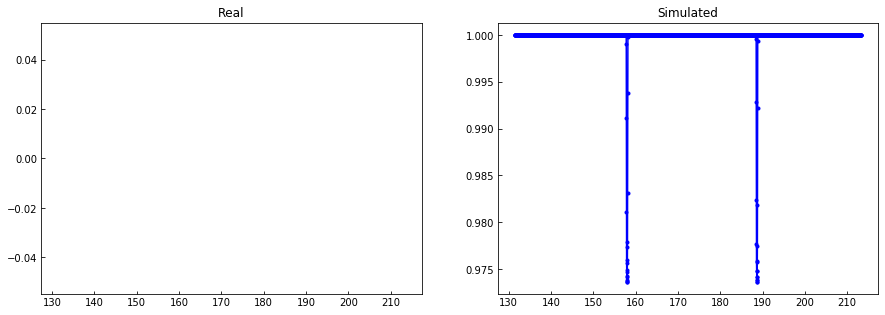

----------------------------------------------------------------


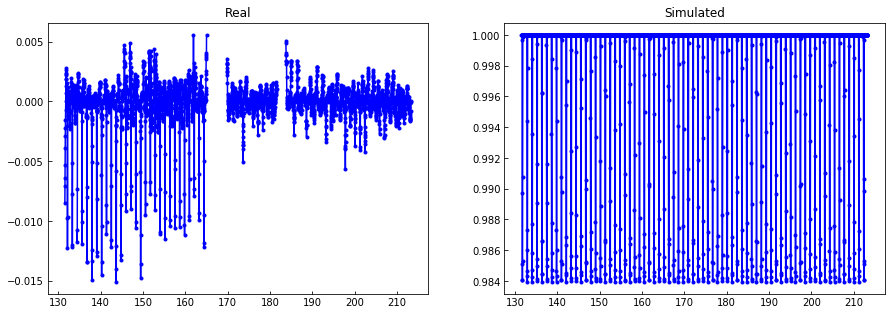

----------------------------------------------------------------


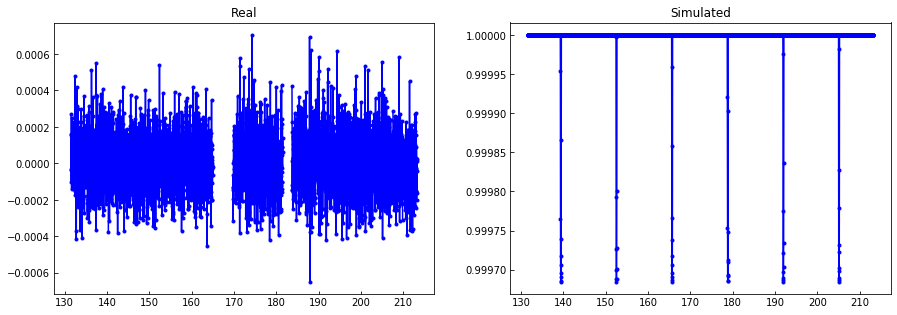

----------------------------------------------------------------


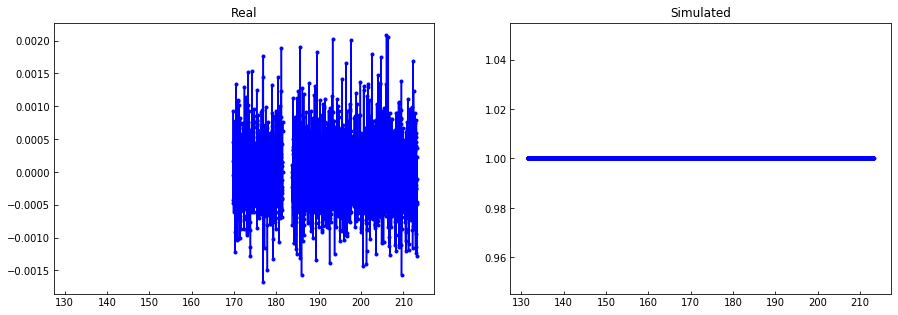

----------------------------------------------------------------


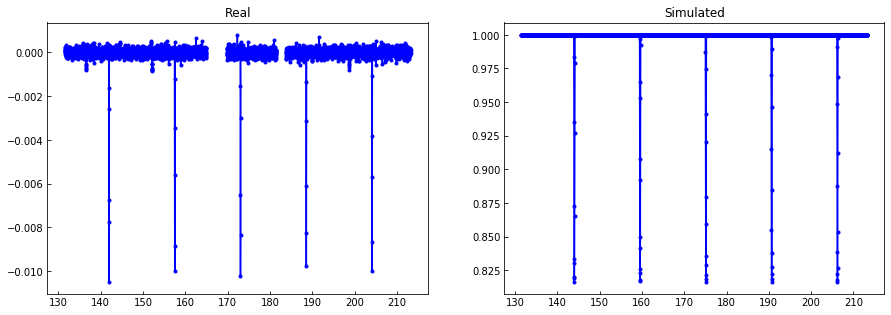

----------------------------------------------------------------


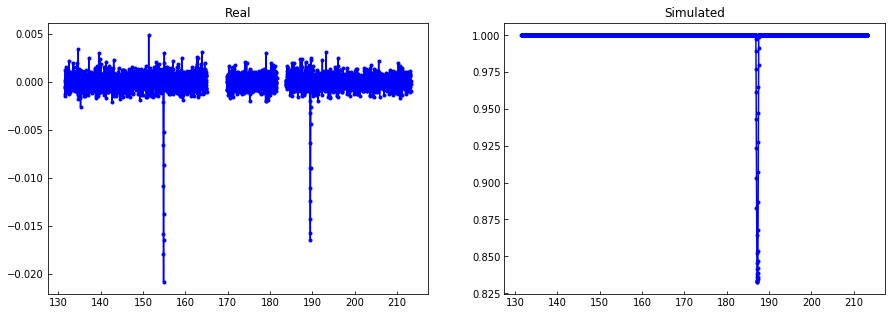

----------------------------------------------------------------


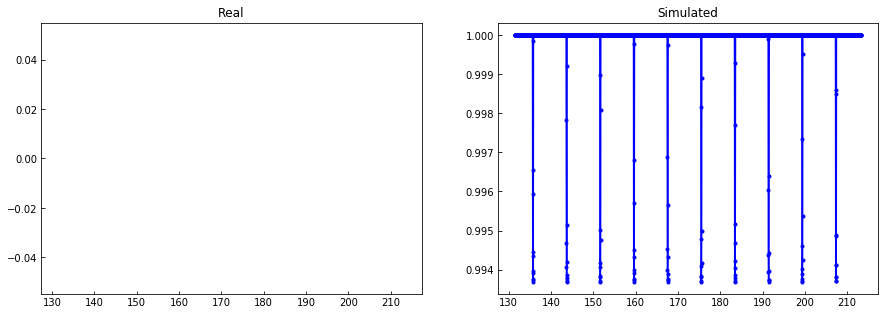

----------------------------------------------------------------


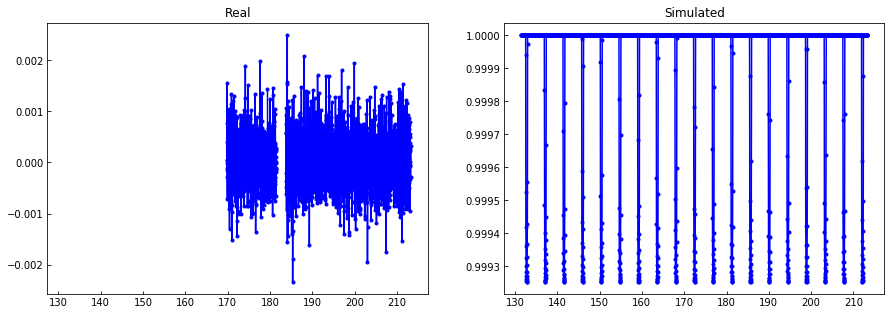

----------------------------------------------------------------


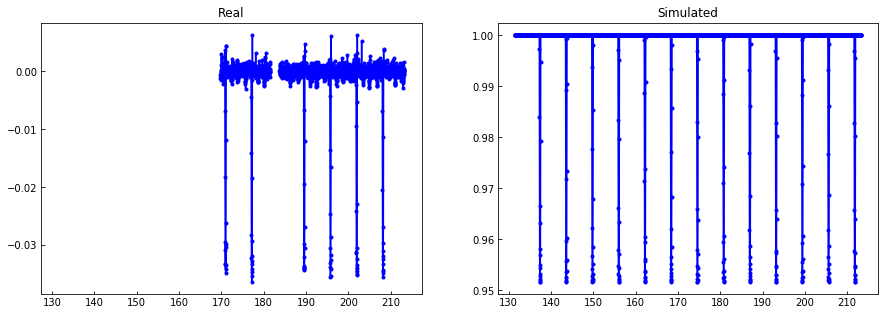

----------------------------------------------------------------


In [83]:
print("Raw light curve comparison")
plot_n_lc(time_lc[:,:4000], process_lc[:,:4000], n_sampleds )

Mandel-Agol of Kepler againts ours comparison


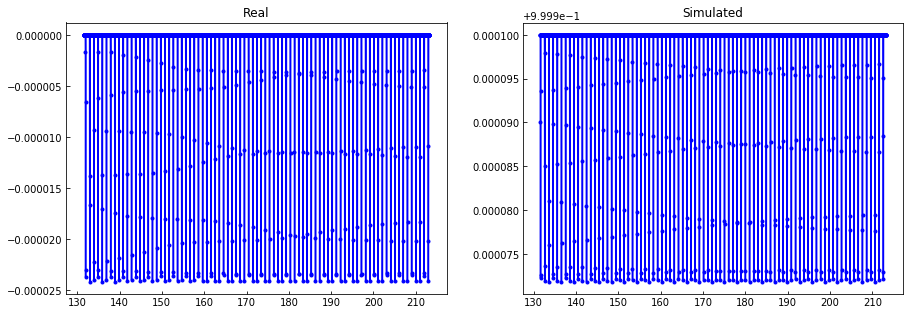

----------------------------------------------------------------


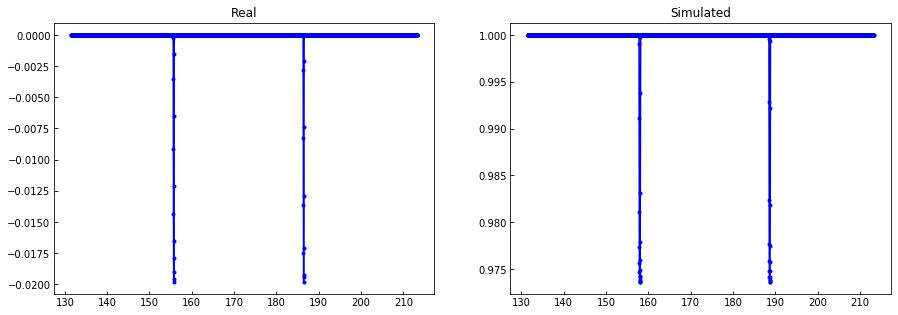

----------------------------------------------------------------


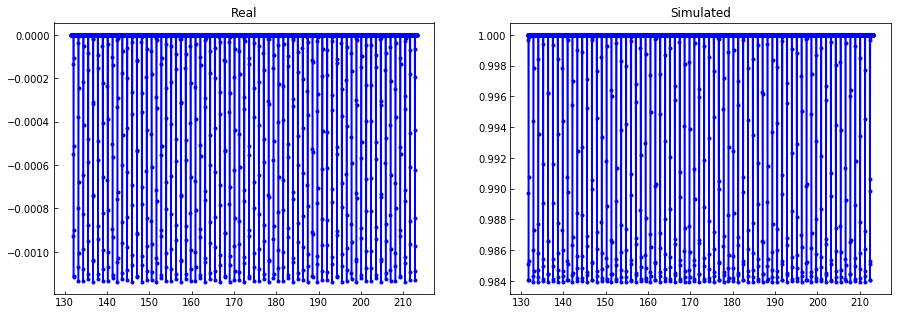

----------------------------------------------------------------


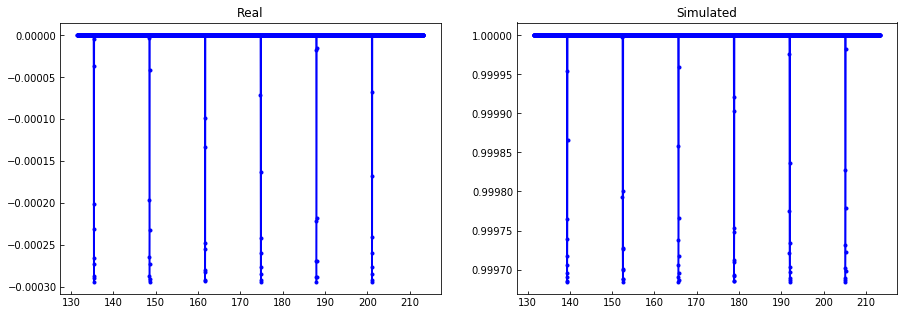

----------------------------------------------------------------


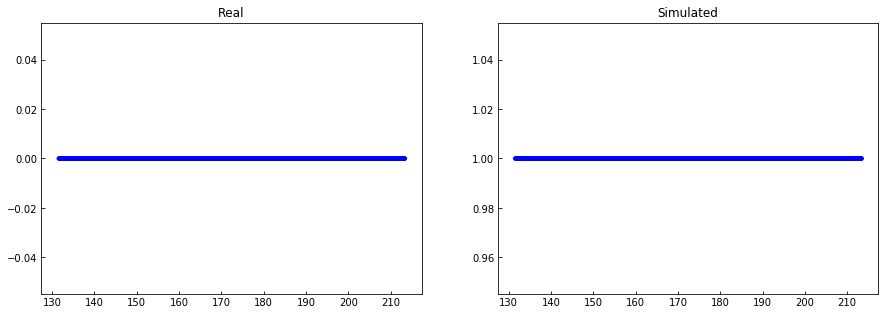

----------------------------------------------------------------


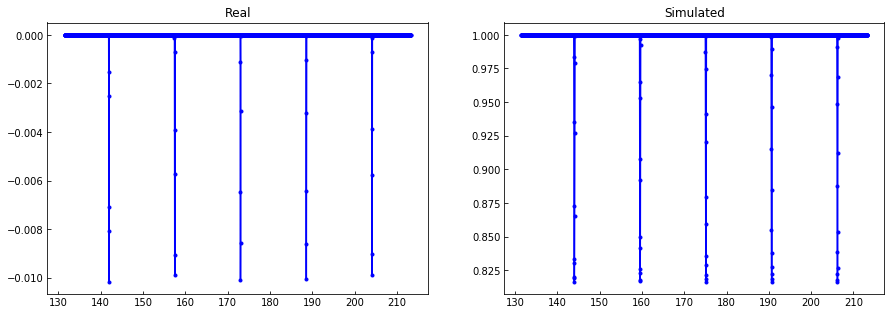

----------------------------------------------------------------


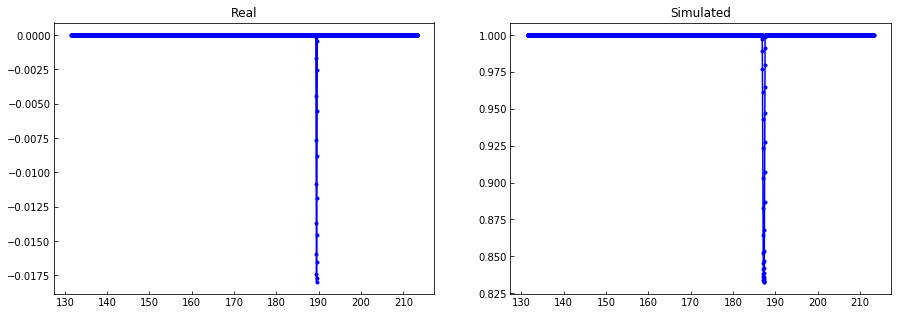

----------------------------------------------------------------


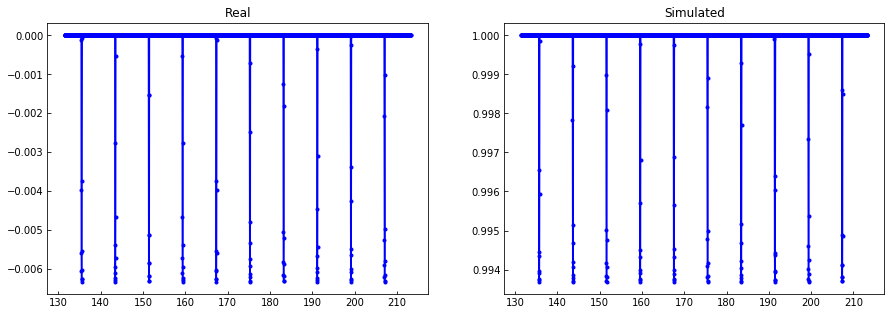

----------------------------------------------------------------


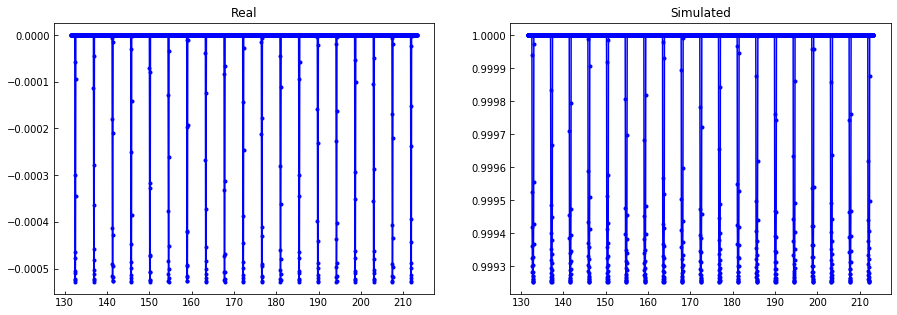

----------------------------------------------------------------


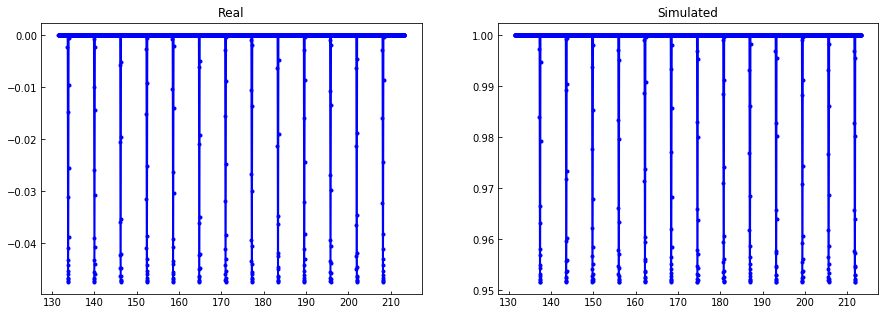

----------------------------------------------------------------


In [84]:
print("Mandel-Agol of Kepler againts ours comparison")
plot_n_lc(time_lc[:,:4000], mandel_lc[:,:4000], n_sampleds )